# Corto 1 - ModSim
- Diego Cordova 20212
- Gabriel Vicente 20498

## Task 1

Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la probabilidad de que haya N huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en otras palabras, el número promedio de huracanes por año es de 7.

1. ¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?
<br/>
<span style="color:skyblue">
R// Si se puede modelar como una variable aleatoria de poisson en dónde la probabilidad del que sucede un evento determinado, en este caso el huracán, está dada por el intervalo de tiempo que se analiza. En este caso la variabla lambda es 7.
</span>


2. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique PMF (probability mass function) de estos eventos

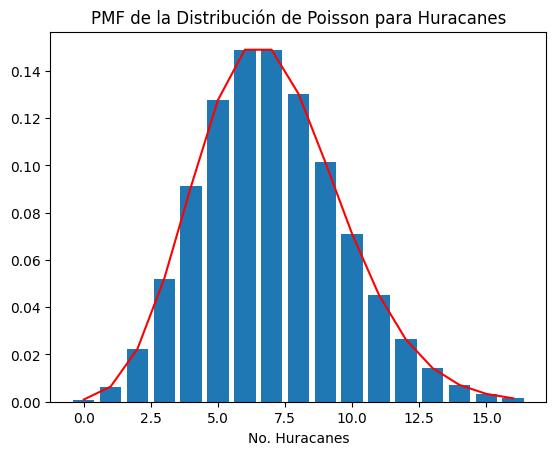

In [84]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
import numpy as np

num_huracanes = range(0, 17)
pmf = poisson.pmf(num_huracanes, mu=7)

plt.bar(num_huracanes, pmf)
plt.plot(pmf, color='red')
plt.xlabel('No. Huracanes')
plt.title('PMF de la Distribución de Poisson para Huracanes')
plt.show()

3. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique CDF (cumulative distribution function) de estos eventos

4. ¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores?

## Task 2
Usted es un analista de simulación encargado de modelar la llegada de clientes a una tienda minorista. Desea
simular la cantidad de clientes que llegan por hora utilizando dos métodos diferentes: el método de transformación
inversa y el método de rechazo.

### Task 2.1
Defina la distribución de probabilidad objetivo para las llegadas de clientes en función de los datos históricos.
Supongamos que ha recopilado datos y descubrió que la cantidad de clientes que llegan por hora sigue una
distribución de Poisson con un promedio de 10 clientes por hora (λ = 10).

1. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la distribución de Poisson.
2. Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una hora.
3. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.
4. Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.

[4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.539992976248486e-05, 4.53999297

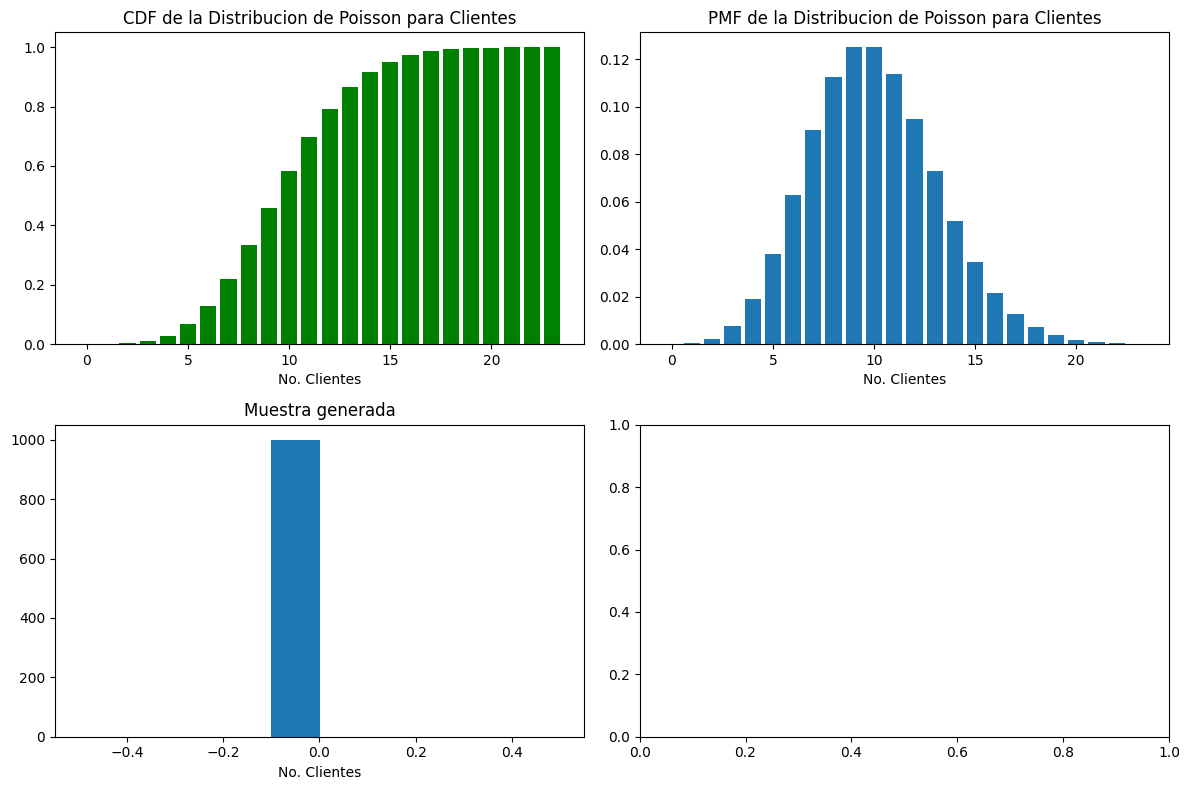

In [89]:
horas = range(0, 24)

# Datos por transformacion inversa
cdf_poisson = poisson.cdf(horas, mu=10)

def inversa_poisson(size):
    muestra = []

    for i in range(size):
        U = np.random.uniform(0, 1)
        k = 0
        p = poisson.cdf(k, 10)
        
        while p >= U:
            k += 1
            p = poisson.cdf(k, 10)

        muestra.append(p)

    return muestra

muestra_inversa = inversa_poisson(1000)
print(muestra_inversa)

# Datos teoricos
pmf = poisson.pmf(horas, mu=10)

media_teorica = poisson.mean(mu=10)
varianza_teorica = poisson.var(mu=10)

print('Media Teorica: ', media_teorica)
print('varianza Teorica: ', varianza_teorica)

# Graficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.bar(horas, cdf_poisson, color='green')
ax1.set_xlabel('No. Clientes')
ax1.set_title('CDF de la Distribucion de Poisson para Clientes')

ax2.bar(horas, pmf)
ax2.set_xlabel('No. Clientes')
ax2.set_title('PMF de la Distribucion de Poisson para Clientes')

ax3.hist(muestra_inversa)
ax3.set_xlabel('No. Clientes')
ax3.set_title('Muestra generada')

plt.tight_layout()
plt.show()

### Task 2.2
Defina una distribución de propuesta que sea más fácil de muestrear y que cubra el soporte de la distribución de
Poisson de destino. Por ejemplo, puede elegir una distribución uniforme o geométrica.

1. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto en todo el soporte de la distribución de Poisson.
2. Implemente el método de rechazo para generar muestras aleatorias a partir de la distribución de Poisson.
3. Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una hora utilizando el método de rechazo.
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.
5. Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.

**Responda:**
1. Compare los resultados de los dos métodos. ¿Qué método proporciona un mejor ajuste a la distribución de
Poisson objetivo?
2. Discuta las ventajas y desventajas de cada método en términos de eficiencia y precisión.
3. Considere diferentes escenarios, como cambiar la tasa de llegada promedio (λ) o usar diferentes
distribuciones de propuestas. ¿Cómo funcionan los métodos en estos escenarios?